In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from cvxpy import *

# LASSO for sparse recovery

$$
\begin{array}{ll}
\mbox{minimize} & \| Ax - b\|_2^2 + \rho \|x\|_1
\end{array}
$$

- generate problem data:

<Container object of 3 artists>

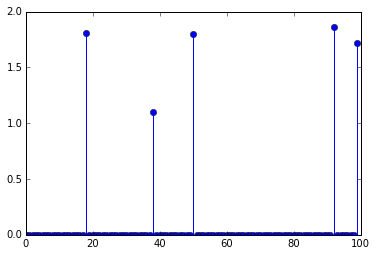

In [2]:
n = 100
nonzeros = 5
obs = 30

x_true = np.zeros(n)
x_true[:nonzeros] = np.random.rand(nonzeros)+1
np.random.shuffle(x_true)

A = np.random.randn(obs,n)
b = A.dot(x_true) + np.random.rand(obs)*.1

plt.stem(x_true)

- inspect the least squares recovery:

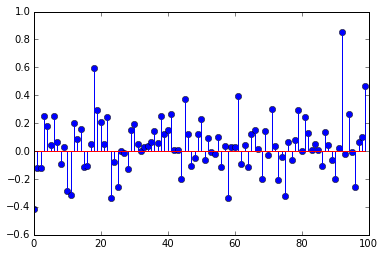

In [3]:
x = Variable(n)
obj = sum_squares(A*x - b)
Problem(Minimize(obj)).solve()


x = np.array(x.value).flatten()


fig = plt.figure()
ax = fig.add_subplot(111)
ax.stem(x)
fig.savefig('ls_recovery.pdf')

- inspect the LASSO recovery, and note that it accurately recovers the correct signal

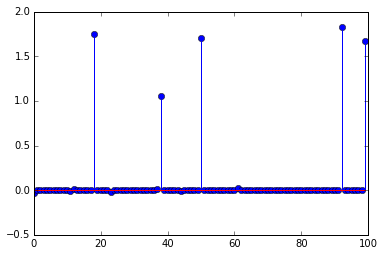

In [4]:
x = Variable(n)
obj = sum_squares(A*x - b) + 1.5*norm(x,1)

Problem(Minimize(obj)).solve()
x = np.array(x.value).flatten()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.stem(x)
fig.savefig('lasso_recovery.pdf')

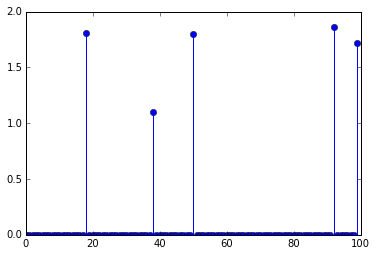

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.stem(x_true)
fig.savefig('x_true.pdf')